In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from mpl_toolkits import mplot3d
import pandas as pd
import random
import math

random.seed(10)

In [2]:
#Calculate the gradient of function f on x:
def gradient(f, x):
    result = []
    for i in range(len(x)):
        delta = np.zeros(len(x))
        delta[i] += 1e-10
        result.append((f(x + delta) - f(x - delta))/ (2 * 1e-10))
    return np.array(result)

<h2>Gradient descent<h2> <br>
 $\theta_{t+1} = \theta_t - \eta . \frac{\delta}{\delta x}f(x)$

In [3]:
#Gradient descent
def batchgd(f, initialize, learning_rate, theta_storage):
    loop = 0
    theta = np.array(initialize)
    while np.sum(np.abs(gradient(f, theta))) > 1e-10:
        theta_storage.append(theta)
        loop += 1
        theta = theta - learning_rate * gradient(f, theta)
        if loop == 10000:
            print("Not convergence!")
            break
    return round(f(theta)), np.round(theta, decimals=6), loop
        

<h2>Momentum<h2> <br>
$v_{t+1}=\gamma v_t + \eta \frac{\delta}{\delta x}f(x)$<br>
$\theta_{t+1} = \theta_t - v_t$

In [4]:
def momentum(f, initialize, learning_rate, eta, theta_storage):
    theta = np.array(initialize)
    v = np.zeros(len(initialize))
    theta_storage.append(theta)
    loop = 0
    while np.sum(np.abs(gradient(f, theta))) > 1e-2: 
        v = eta * v + learning_rate * gradient(f, theta)
        theta = theta - v
        theta_storage.append(theta)
        loop += 1
        if loop > 10000:
            print("Not convergence!")
            break
    return round(f(theta)), np.round(theta, decimals=6), loop

In [5]:
def f(x):
    return x[0] ** 2 + 10 * math.sin(x[0])

<h2> Nesterov accelerated gradient <h2><br>
    $v_{t+1} = \gamma v_t + \eta \frac{\delta}{\delta x}f(x - \gamma v_t)$<br>
    $\theta_{t+1} = \theta_t - v_t$

In [6]:
def nag(f, initialize, learning_rate, eta, theta_storage):
    theta = np.array(initialize)
    theta_storage.append(theta)
    v = np.zeros(len(theta))
    loop = 0
    while np.sum(np.abs(gradient(f, theta))) > 1e-10:
        v = eta * v + learning_rate * gradient(f, theta - eta * v)
        #Must not use theta -= v because theta_storage point to the same memory block.
        theta = theta - v 
        theta_storage.append(theta)
        loop += 1
        
        if loop > 10000:
            print("Not convergence")
            break
    return np.round(f(theta)), np.round(theta, decimals=6), loop

<h2>Adagrad<h2><br>
    $\theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}}.g_{t, i}$

In [7]:
def adagrad(f, initialize, learning_rate, theta_storage):
    G = np.zeros(len(initialize))
    theta = np.array(initialize)
    theta_storage.append(theta)
    loop = 0
    epsilon = 1e-10
    
    while np.sum(np.abs(gradient(f, theta))) > 1e-10:
        g = gradient(f, theta)
        G += g ** 2
        theta = theta - learning_rate / np.sqrt(G + epsilon) * g
        theta_storage.append(theta)
        loop += 1
        
        if loop > 1000:
            print("Not convergence")
            break
    return np.round(f(theta)), np.round(theta, decimals=6), loop        
    

<h2>RMSprop<h2><br>
    $E[g^2]_t = \gamma E[g^2]_{t-1}+(1-\gamma)g_t^2$<br>
    $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_{t} + \epsilon}}g_t$

In [8]:
def rms(f, initialize, learning_rate, eta, theta_storage):
    theta = np.array(initialize)
    theta_storage.append(theta)
    loop = 0
    epsilon = 1e-10
    E = np.zeros(len(initialize))
    
    while np.sum(np.abs(gradient(f, theta))) > 1e-10:
        g = gradient(f, theta)
        E = eta * E + (1 - eta) * (g ** 2)
        theta = theta - learning_rate / np.sqrt(E + epsilon) * g
        theta_storage.append(theta)
        loop += 1
        
        if loop > 1000:
            print("Not convergence")
            break
    return np.round(f(theta)), np.round(theta, decimals=6), loop

<h2>Adadelta<h2><br>
    $E[g^2]_t = \gamma E[g^2]_{t-1}+(1-\gamma)g_t^2$<br>
    $E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1}+(1-\gamma)\Delta \theta_t^2$<br>
    $\theta_{t+1} = \theta_{t} - \frac{\sqrt{E[\Delta \theta^2]_{t-1}+\epsilon}}{\sqrt{E[g^2]_t + \epsilon}}g_t$

In [9]:
def adadelta(f, initialize, eta, theta_storage):
    theta = np.array(initialize)
    ptheta = np.array(initialize)
    theta_storage.append(theta)
    loop = 0
    epsilon = 1e-10
    delta = np.zeros(len(theta))
    E = np.zeros(len(theta))
    
    while np.sum(np.abs(gradient(f, theta))) > 1e-10:
        g = gradient(f, theta)
        E = eta * E + (1 - eta) * (g ** 2)
        delta = eta * delta + (1 - eta) * ((theta - ptheta) ** 2)
        ptheta = theta
        theta = theta - np.sqrt(delta + epsilon) / np.sqrt(E + epsilon) * g
        theta_storage.append(theta)
        loop += 1
        
        if loop > 1000:
            print("Not convergence")
            break
    return np.round(f(theta)), np.round(theta, decimals=6), loop

<h3>Plot 2D diagram<h3>

In [10]:
#Examplt with my function:
def f(x):
    return x[0] ** 2 + 10 * math.sin(x[0])

In [12]:
#Plot the gradient descent
x = np.linspace(-7, 7, 2000)
y = np.array([f([i]) for i in x])
fig, ax = plt.subplots()
#ax.plot(x, y)
#ax.set_xlim(-5, 5)
theta = [7]
eta = 0.1
theta_storage = []
learning_rate = 0.5
#iterate = batchgd(f, theta, learning_rate, theta_storage)[-1]
#iterate = momentum(f, theta, learning_rate, eta, theta_storage)[-1]
#iterate = nag(f, theta, learning_rate, eta, theta_storage)[-1]
#iterate = adagrad(f, theta, learning_rate, theta_storage)[-1]
#iterate = rms(f, theta, learning_rate, eta, theta_storage)[-1]
iterate = adadelta(f, theta, eta, theta_storage)[-1]

def update(i):
    label = 'iteration {0}/{1}, x0 = {2}, learning rate = {3} '.format(i + 1, iterate, theta_storage[0][0], learning_rate)

    animlist = plt.cla()
    animlist = plt.xlim(-7, 7)
    animlist = plt.plot(x, y)
    
    if i == 0:
        animlist = plt.plot(theta_storage[0], f(theta_storage[0]), 'ko', markersize=5)
    else:
        a = min(theta_storage[i - 1][0], theta_storage[i][0])
        b = max(theta_storage[i - 1][0], theta_storage[i][0])
        
        animlist = plt.plot([a, b], [f([a]), f([b])], color='black')
        animlist = plt.plot( theta_storage[i - 1], f(theta_storage[i - 1]), 'ko', theta_storage[i], f(theta_storage[i]), 'ro')
        
        
    ax.set_xlabel(label)
    ax.set_title("$y = x^2 + 10\sin(x)$")
    return animlist, ax

myAnimation = anm.FuncAnimation(fig, update, frames=np.arange(0, iterate), interval=800, repeat=False)


<IPython.core.display.Javascript object>

Not convergence


<h3>Plot contour diagram<h3> 

Beale function: 
$f(x) = (1.5 -x_1+x_1x_2)^2+(2.25-x_1+x_1x_2^2)^2+(2.625-x_1+x_1x_2^3)^2$

In [13]:
def Beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

In [14]:
#Contour plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#Traning 
theta = np.array([0.5, -0.9])
theta_storage = []
learning_rate = 0.05
iterate = batchgd(Beale, theta, learning_rate, theta_storage)[-1]
print(iterate)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

def update(i):
    label = 'iteration {0}, x0 = {1}, learning rate = {2}'.format(i, theta[0], learning_rate)
    
    anm = plt.cla()
    anm = ax.contour(X, Y, np.log((1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2), levels=30)
    anm = ax.set_xlim(-4, 4)
    if i != 0:
        anm = ax.plot(np.array(theta_storage[:i])[:,0], np.array(theta_storage[:i])[:, 1], color = 'red', marker = '', markersize=3)
        anm = ax.plot(theta_storage[i - 1][0], theta_storage[i - 1][1], 'ro')
    
    anm = ax.set_xlabel(label)
    return anm, ax

myAnimation = anm.FuncAnimation(fig, update, frames = np.arange(0, iterate), interval=600, repeat=False)

Not convergence!
10000


<IPython.core.display.Javascript object>

<h3>Plot 3D diagram<h3>

<IPython.core.display.Javascript object>


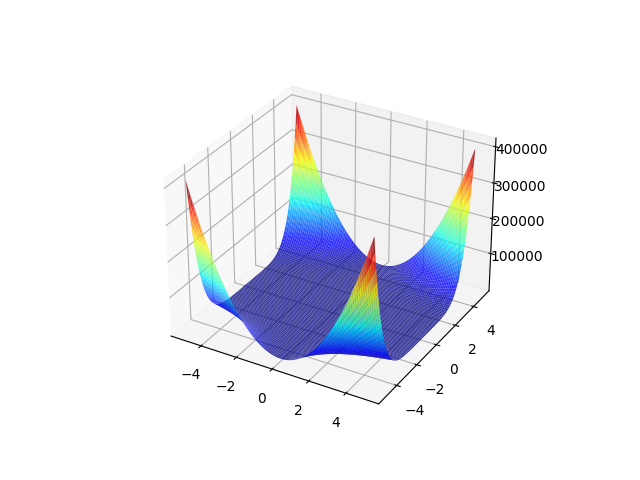

In [15]:
#Surface plotting
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, (1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2, rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)